# Statistical Inference

So far, we have been looking at what would be classified as descriptive statistics. We were looking at how do explore or summarize a dataset.

Now, we are moving on to statistical inference, where we are interested not just in the sample that we have, but in inferring something about the population from which the sample came. Our goal is to draw conclusions from data.

Three common tasks in statistical inference:
* estimating an underlying parameter about a population (eg. the population mean)
* providing an interval inference about the underlying parameter
* testing if the underlying parameter satisfy certain conditions.

## Bootstrap Confidence Intervals

The **empirical bootstrap** is a technique popularized by Bradley Efron in 1979. It is easy to understand and implement, but is just recently gaining popularity, since it is not really feasible without modern computing power. The bootstrap allows us to substitute fast computation for theoretical math.

**Big Idea:** perform computations on the data itself to estimate the variation of statistics that are themselves computed from the same data. That is, the data is ‘pulling itself up by its own bootstrap.’ 

Since the bootstrap allows us to estimate the variation of these statistics, we can use this technique to construct confidence intervals.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sleeping = pd.read_csv('../data/atus_sleeping.csv')

In [3]:
sleeping.head()

,participant_id,minutes_spent_sleeping,sex
0,20181211181182,270,Male
1,20180908180663,600,Male
2,20180706181412,355,Male
3,20181009181978,405,Male
4,20180503180964,270,Male


Let's build a confidence interval for the median of the number of minutes spent sleeping.

In [4]:
sleeping.minutes_spent_sleeping.median()

550.0

Our point estimate is 550 minutes.

Now, the idea is to repeatedly resample with replacement from our observations.

In [5]:
point_estimate = np.median(sleeping.minutes_spent_sleeping)

num_resamples = 10000
conf_level = 0.95
margin = (1 - conf_level) / 2
#lower_index = int(num_resamples * margin)
#upper_index = int(num_resamples * (1-margin))

values = sleeping.minutes_spent_sleeping.to_list()

resample_values = []

for i in range(num_resamples):
    resample = np.random.choice(values, len(values))
    resample_values.append(np.median(resample))

top_quantile = np.quantile(resample_values, q = 1 - margin)
bottom_quantile = np.quantile(resample_values, q = margin)

print('lower bound: ', point_estimate - (top_quantile - point_estimate))
print('upper bound: ', point_estimate + (point_estimate - bottom_quantile))

lower bound:  502.5
upper bound:  615.5


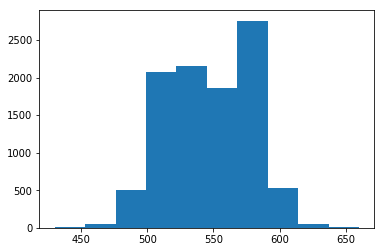

In [6]:
plt.hist(resample_values);

## Bootstrap For Friday Crashes

Let's say that we're trying to ensure that we have enough emergency responders scheduled for this upcoming Friday. We want to have a good idea of how many crashes we can expect so that we can have enough responders on call, but do not want to schedule way too many.

The file `friday_crashes.csv` contains the count of the number of reported accidents for all Fridays in 2018 in Davidson County.


In [7]:
friday_crashes = pd.read_csv('../data/friday_crashes.csv')

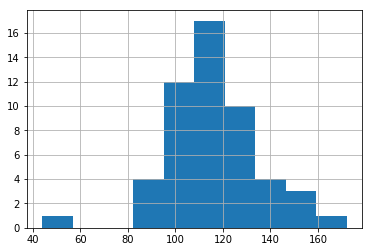

In [8]:
friday_crashes['Accident Number'].hist();

While this contains data for every single Friday in 2018, we can view it as a sample for the *population* of *all*  Fridays. If we want to make inferences about all Fridays, we need to construct a confidence interval rather than just look at sample statistics.

Perhaps we would like to have a good idea about what the 80th percentile of the number of crashes is. This way, we can schedule enough responders so that we are covered in 80% of cases.

We can use the bootstrap to construct this interval.

In [9]:
values = friday_crashes['Accident Number'].values.tolist()

point_estimate = np.quantile(values, q = 0.8)

num_resamples = 10000
conf_level = 0.95
margin = (1 - conf_level) / 2
#lower_index = int(num_resamples * margin)
#upper_index = int(num_resamples * (1-margin))

resample_values = []

for i in range(num_resamples):
    resample = np.random.choice(values, len(values))
    resample_values.append(np.quantile(resample, q = 0.8))

top_quantile = np.quantile(resample_values, q = 1 - margin)
bottom_quantile = np.quantile(resample_values, q = margin)

print('lower bound: ', point_estimate - (top_quantile - point_estimate))
print('upper bound: ', point_estimate + (point_estimate - bottom_quantile))

lower bound:  121.60000000000002
upper bound:  136.60000000000002


Thus, we can say that we are 95\% confident that the 80th percentile of number of accidents on a Friday is between 121.6 and 136.8.

Here's a function that can be imported.

In [10]:
from nssstats.bootstrap import bootstrap_ci

In [11]:
bootstrap_ci(friday_crashes['Accident Number'].values, statistic = np.quantile, q = 0.8)

(121.60000000000002, 136.60000000000002)

One of the advantages of using bootstrap resampling is that you can use reasampling to compute a confidence interval for any statistic you like. Let's say we want a confidence interval for the standard deviation of the number of accidents.

In [14]:
bootstrap_ci(friday_crashes['Accident Number'].values, statistic = np.std)

(14.616509627403342, 25.899855706112344)